# Data Preprocessing

## Removing unopenable files

In [2]:
import os
import cv2

c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [54]:
for folder in os.listdir("unprocessed data"):
    for file in os.listdir(os.path.join("unprocessed data", folder)):
        try:
            cv2.imread(os.path.join('unprocessed data', folder, file))
        except Exception as e:
            os.remove(os.path.join("unprocessed data", folder, file))
            print(f"Removed {file} [{e}]")

It seems like there are no corrupt or unopenable files

## Data Augmentation

### Importing Modules

In [5]:
import albumentations as A

In [13]:
import matplotlib.pyplot as plt

In [33]:
import uuid

In [50]:
from PIL import Image

In [51]:
import numpy as np

### Transformations

In [31]:
transform = A.Compose([
    A.HorizontalFlip(),
    A.RandomBrightnessContrast(),
    A.RandomRotate90(),
    A.Flip(),
    A.RGBShift(),
    A.HueSaturationValue(),
    A.CLAHE(),
    A.RandomGamma(),
    A.Blur(),
    A.ToGray(),
    A.ImageCompression(),
])
# listing transformations 

In [7]:
testImage = cv2.cvtColor(cv2.imread('unprocessed data/supercars/48832.jpg'), cv2.COLOR_BGR2RGB)

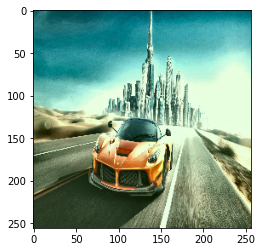

In [42]:
plt.imshow(cv2.resize(transform(image=testImage)['image'], (256, 256)))

In [55]:
for folder in os.listdir("unprocessed data"):
    for file in os.listdir(os.path.join("unprocessed data", folder)):
        filePath = os.path.join("unprocessed data", folder, file)
        image = Image.open(filePath)
        image = np.array(image)
        for _ in range(50):
            augmentedImg = transform(image=image)['image']
            cv2.imwrite(os.path.join('augmented data', folder, str(uuid.uuid1()) + '.jpg'), augmentedImg)